# 📊Project: Analysing Indicators that cause Heavy Traffic on I-94

# Table Of Contents
1. [Project](#)
    * [Introduction](#Introduction)
    * [Data Description](#📝Data-Description)
    * [Data Preparation](#✏️Data-Preparation)
2. [Data Quality Report](#Data-Quality-Report)
3. [Data Cleaning](#Data-Cleaning)
    * [Drop Duplicate Rows](#✅Drop-duplicate-rows)
    * [Covert Data Types](#✅Convert-Data-Types)
    * [Add Hour and Time Interval Columns](#⌚Add-Hour-and-Time-Interval-Columns)
4. [Divide Two DataFrames](#Divide-Two-DataFrames)
5. [The distribution of Traffic Volume in Week & Holiday](#The-distribution-of-Traffic-Volume-in-Week-&-Holiday)
6. [Time Indicators](#Time-Indicators)
    * [WeekDay](#By-Week-Day)
    * [Holiday](#By-Holiday)
    * [Traffic Volume Analysis by Day of the Week](#Traffic-Volume-Analysis-by-Day-of-the-Week)
    * [Rush Hours in Weekdays](#Rush-Hours-in-Weekdays)
7. [Weather Indicators](#Weather-Indicators)
    * [Correlation with Traffic Volume](#Correlation-with-Traffic-Volume)
    * [Weather Types](#Weather-Types)
8. [Conclusion](#Conclusion)

# Introduction

- Traffic Congestion is a huge problem for many cities around the world, caused by various factors such as high traffic density, pedestrian, weather conditions, accidents, etc.
- In this project, we're going to explore a dataset titled **`Heavy Traffic Indicators in `The Midway Sation`** which is between Minneapolis and Saint Paul. 
- The purpose of this analysis is to uncover indicators causing heavy traffic in the station. 

# 📝Data Description

The dataset documentation mentions that a station located approximately midway between `Minneapolis` and `Saint Paul` recorded the traffic data. Also, the station only records **westbound traffic** (cars moving from east to west).

![i94](picture/i94.png)

- holiday: Categorical US National holidays plus regional holiday, Minnesota State Fair
- temp: Numeric Average temp in kelvin
- rain_1h: Numeric Amount in mm of rain that occurred in the hour
- snow_1h: Numeric Amount in mm of snow that occurred in the hour
- clouds_all: Numeric Percentage of cloud cover
- weather_main: Categorical Short textual description of the current weather
- weather_description: Categorical Longer textual description of the current weather
- date_time: DateTime Hour of the data collected in local CST time
- traffic_volume: Numeric Hourly I-94 ATR 301 reported westbound traffic volume

# ✏️Data Preparation

In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
metro = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
metro.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


# Data Quality Report

In [4]:
def check_data_quality(df):
    quality_report = {
        'missing_values' : df.isnull().sum().to_dict(),
        'duplicate_values': df.duplicated().sum(),
        'df_info' : df.info(),
    }
    return quality_report

In [5]:
quality_report = check_data_quality(metro)
display(quality_report)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


{'missing_values': {'holiday': 48143,
  'temp': 0,
  'rain_1h': 0,
  'snow_1h': 0,
  'clouds_all': 0,
  'weather_main': 0,
  'weather_description': 0,
  'date_time': 0,
  'traffic_volume': 0},
 'duplicate_values': 17,
 'df_info': None}

* Holiday - 48,143 missing values: This means these values are on weekdays

In [6]:
metro.describe(include='object')

,holiday,weather_main,weather_description,date_time
count,61,48204,48204,48204
unique,11,11,38,40575
top,Labor Day,Clouds,sky is clear,2013-05-19 10:00:00
freq,7,15164,11665,6


# Data Cleaning

## ✅Drop duplicate rows

In [7]:
metro.loc[metro.duplicated()].sort_values(by = ['traffic_volume'], ascending=False)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
26784,NaN,289.775,0.0,0.0,56,Clouds,broken clouds,2016-09-21 15:00:00,5365
34973,NaN,296.950,0.0,0.0,1,Thunderstorm,thunderstorm,2017-06-30 13:00:00,5263
34971,NaN,295.770,0.0,0.0,75,Clouds,broken clouds,2017-06-30 12:00:00,5229
23851,NaN,289.060,0.0,0.0,90,Clouds,overcast clouds,2016-06-01 10:00:00,4831
34711,NaN,295.010,0.0,0.0,40,Clouds,scattered clouds,2017-06-21 11:00:00,4808
34969,NaN,294.520,0.0,0.0,1,Clear,sky is clear,2017-06-30 11:00:00,4725
27171,NaN,279.287,0.0,0.0,56,Clouds,broken clouds,2016-10-07 18:00:00,4642
34967,NaN,292.840,0.0,0.0,1,Clear,sky is clear,2017-06-30 10:00:00,4638
28879,NaN,267.890,0.0,0.0,90,Snow,light snow,2016-12-06 18:00:00,4520
37572,NaN,288.890,0.0,0.0,1,Clear,sky is clear,2017-09-29 19:00:00,4498


In [8]:
metro.loc[metro['date_time']== '2016-09-21 15:00:00']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
26783,NaN,289.775,0.0,0.0,56,Clouds,broken clouds,2016-09-21 15:00:00,5365
26784,NaN,289.775,0.0,0.0,56,Clouds,broken clouds,2016-09-21 15:00:00,5365


In [9]:
# Keep the last occurrence of duplicates
metro = metro.drop_duplicates(keep='last')

## ✅Convert Data Types

In [10]:
metro['date_time'] = pd.to_datetime(metro['date_time'])

## ⌚Add Hour and Time Interval Columns

In [11]:
metro['hour'] = metro['date_time'].dt.strftime('%H')
metro['hour'] = metro['hour'].astype('Int64')

In [12]:
def hour_interval(hour):
    if hour < 8: 
        return "Night"
    elif hour < 16:
        return "Day"
    else:
        return "Evening"
metro['interval_hour'] = metro['hour'].map(hour_interval)

# Divide Two DataFrames

We're going to divide the dataframe into two small dataframes. One is for One is for **weekdays**, another is  **holidays** to analyze the **traffic behavior** of weekdays and holiday

In [13]:
metro['holiday'].value_counts(dropna=False).sort_values(ascending=False)

holiday
NaN                          48126
Labor Day                        7
Thanksgiving Day                 6
Christmas Day                    6
New Years Day                    6
Martin Luther King Jr Day        6
Columbus Day                     5
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
Independence Day                 5
State Fair                       5
Name: count, dtype: int64

In [14]:
weekday_df = metro.loc[metro['holiday'].isnull()]
holiday_df = metro.loc[metro['holiday'].notnull()]

# The distribution of Traffic Volume in Weekdays & Holiday

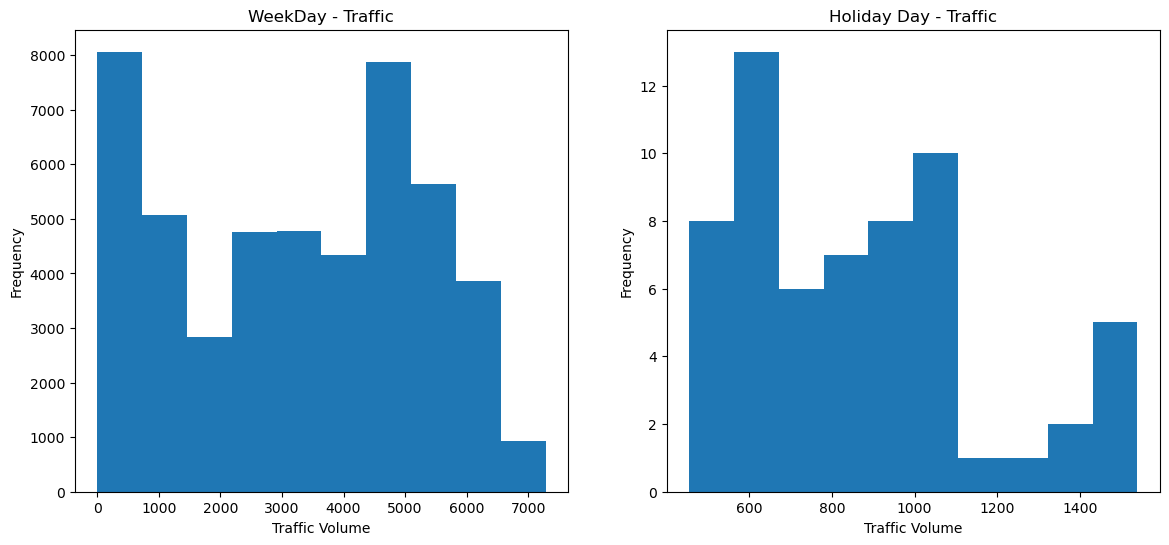

In [15]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(14,6))

#Weekday
axes[0].hist(weekday_df['traffic_volume'])
axes[0].set_xlabel('Traffic Volume')
axes[0].set_ylabel('Frequency')
axes[0].set_title('WeekDay - Traffic')

#Holiday
axes[1].hist(holiday_df['traffic_volume'])
axes[1].set_xlabel('Traffic Volume')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Holiday Day - Traffic')

plt.show()

In [16]:
print(weekday_df['traffic_volume'].describe())
print("\n")
print(holiday_df['traffic_volume'].describe())

count    48126.000000
mean      3262.652766
std       1986.356425
min          0.000000
25%       1198.000000
50%       3384.000000
75%       4934.000000
max       7280.000000
Name: traffic_volume, dtype: float64


count      61.000000
mean      865.442623
std       291.028952
min       455.000000
25%       615.000000
50%       812.000000
75%      1041.000000
max      1538.000000
Name: traffic_volume, dtype: float64


**The histograms show that**, traffic volume on weekdays is higher and more various than holidays. On weekdays, the traffic volume recorded up to 7,000 compared to 1,400. This shows the trend of usage cars of people

1. **Weekdays**:
    - 25% (Q1): The volume is low = 1,198. This is possible the traffic volume at night
    - 75% (Q3): The volume is high = 4,934. This is possible the traffic volume at day
2. **Holiday**: the same as **Weekdays
    - 25% (Q1): The volume is low = 615. This is possible the traffic volume at night
    - 75% (Q3): The volume is high = 1.041. This is possible the traffic volume at day

To identify whether the time slots affecting to the traffic volume in the station or not. We're going to divide into three-hour intervals:
- 00:00 -> 7:59 (Night)
- 8:00 -> 15:59 (Day) 
- 16:00 -> 23:59 (Evening) 

# Time Indicators

## By WeekDay

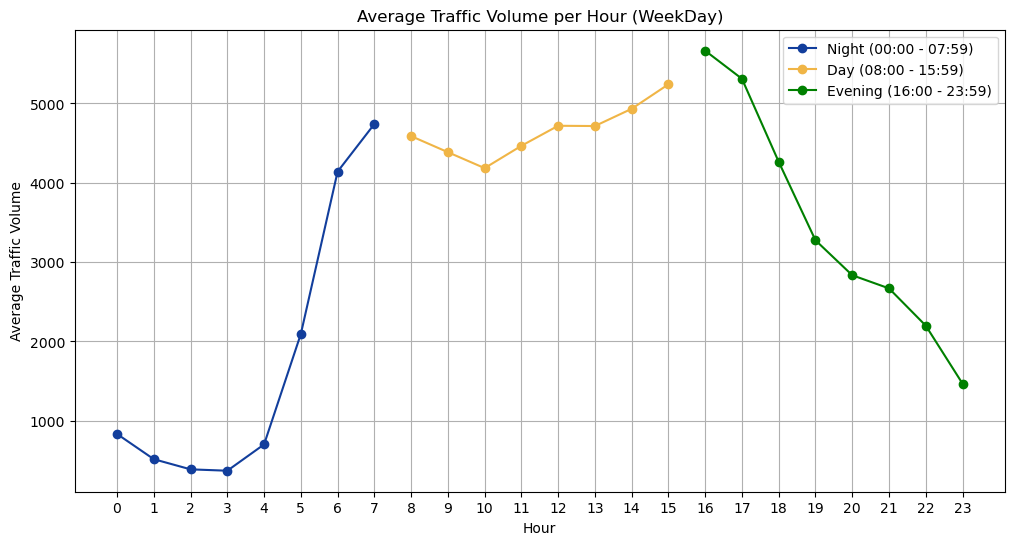

In [17]:
plt.figure(figsize=(12,6))

avg_hr_traffic_volume = weekday_df.groupby('hour')['traffic_volume'].mean()

# Night - Day - Evening
night_interval = avg_hr_traffic_volume.loc[0:7]
day_interval = avg_hr_traffic_volume.loc[8:15]
evening_interval = avg_hr_traffic_volume.loc[16:23]

#LineChart
plt.plot(night_interval.index,night_interval.values,
         label='Night (00:00 - 07:59)',
         color = '#123e9c', marker = 'o')
plt.plot(day_interval.index,day_interval.values,
         label='Day (08:00 - 15:59)',
         color = '#f0b546', marker = 'o')
plt.plot(evening_interval.index, evening_interval.values,
         label = 'Evening (16:00 - 23:59)',
         color = 'Green', marker = 'o')

#
plt.title('Average Traffic Volume per Hour (WeekDay)')
plt.xlabel('Hour')
plt.ylabel('Average Traffic Volume')

plt.xticks(range(0,24))
plt.grid()
plt.legend()
plt.show()

The linechart shows the distribution of average traffic volume across distinct eight-hour time intervals on **a weekday**.
- **Night interval (00:00 – 07:59)**:
    - A downtrend from `0:00 A` to `4:00 AM`, with traffic volume below **1,000** cars per hour.
    - From `5:00 AM`, traffic volume increases significantly
    - At `7:00 AM`, traffic peek nearly **5,000 cars**, due to people who commute to work or take their children to school,...This is reflects daily living habits of people here.
- **Day interval (08:00 - 15:59)**:
    - Traffic volume during daytime hours are relatively stable between **4,200** and **5,300** cars per hour.
    - A notabe peak is around `15:00` PM.
- **On Evening interval (16:00 - 23:59)**:
    - The beginning of Evening interval begins with the highest traffic volume of the day, reaching around **5.500** to **5.700** at `16:00 PM` - `17:00 PM`.
    - From `17:00 PM` onward, traffic volume declines gradually, but it is still higher than Night interval
    - There is a downtrend from head to tail, Although the number of cars passed the station still high than 'Night' interval.

Traffic at night is generally light. Our goal is to find indicators of heavy traffic,therefore we're going to **`focus on 6:00 AM to 17:00 PM, which have the strong traffic activities`**.

## By Holiday

In [18]:
print(holiday_df['holiday'].unique())
print("\n")
print(holiday_df['interval_hour'].unique())
print("\n")
print(holiday_df['hour'].unique())

['Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day']


['Night']


<IntegerArray>
[0]
Length: 1, dtype: Int64


**Due to the lack of hourly diversity, the holiday_df provides limited insights into daily traffic patterns. As a result, the holiday_df is not suitable for identifying indicators of heavy traffic.**

## Traffic Volume Analysis by Day of the Week

In [19]:
condition = (weekday_df["hour"] >= 6) & (weekday_df["hour"] <= 17)
weekday_6_17 = weekday_df.loc[condition].copy()

In [20]:
hour_metrics= weekday_6_17.groupby('hour')['traffic_volume'].agg(freq = 'count', sum='sum').sort_values(by='sum', ascending=False).reset_index()
print(hour_metrics)

    hour  freq       sum
0     16  1988  11259548
1     17  1933  10264377
2     15  1933  10129809
3      7  2079   9854837
4     14  1969   9710889
5      8  2080   9541994
6     12  1954   9219034
7     13  1904   8976699
8      9  2018   8849490
9     11  1950   8707860
10    10  2076   8686266
11     6  2087   8641231


In [21]:
weekday_6_17['dayofweek'] = weekday_6_17['date_time'].dt.dayofweek

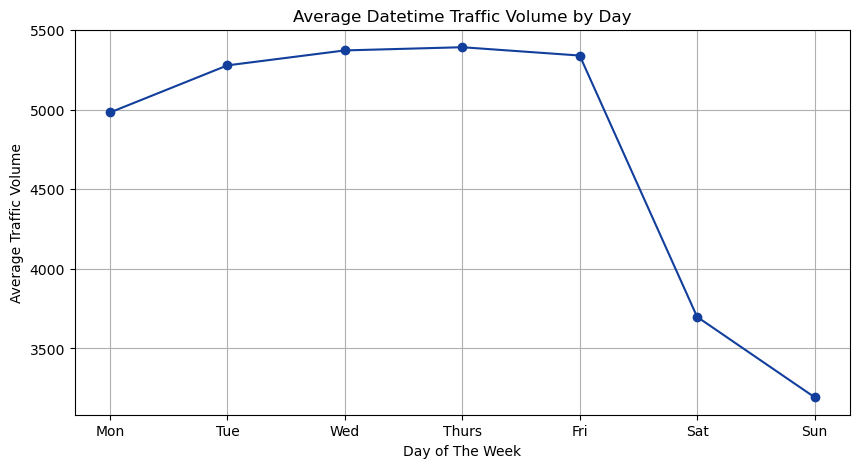

In [22]:
plt.figure(figsize=(10,5))

avg_dayofweek = weekday_6_17.groupby('dayofweek')['traffic_volume'].mean()
plt.plot(avg_dayofweek.index, avg_dayofweek.values,
        color = '#123e9c', marker = 'o')

#Title, xlabel, ylabel
plt.title('Average Datetime Traffic Volume by Day')
plt.xlabel('Day of The Week')
plt.ylabel('Average Traffic Volume')
plt.xticks(ticks = range(0,7),
           labels = [ "Mon","Tue","Wed","Thurs","Fri","Sat","Sun"])

plt.grid()
plt.show()

- **Business days (Monday - Friday)**:
    - From Monday to Friday, the average traffic volume is high with **5.000 - 5.400** cars per day.
    - Wednesday and Thursday record the highest traffic volumes, compared to other days of the week.
    - The trend  reflects commuting habits, where people go to work or school, especially during rush hours from `6:00 AM` to `9:00 AM`
- **Weekends (Saturday - Sunday)**:
    - Weekends drops significantly below **4.000** cars.
    * The reason of drop as people dont go to work or school on weekends.
- Heavy traffic mainly focuses on Business days, especially from Monday to Friday. **`Let's deeply into rush hours in Weekdays`**.

## Rush Hours in Weekdays

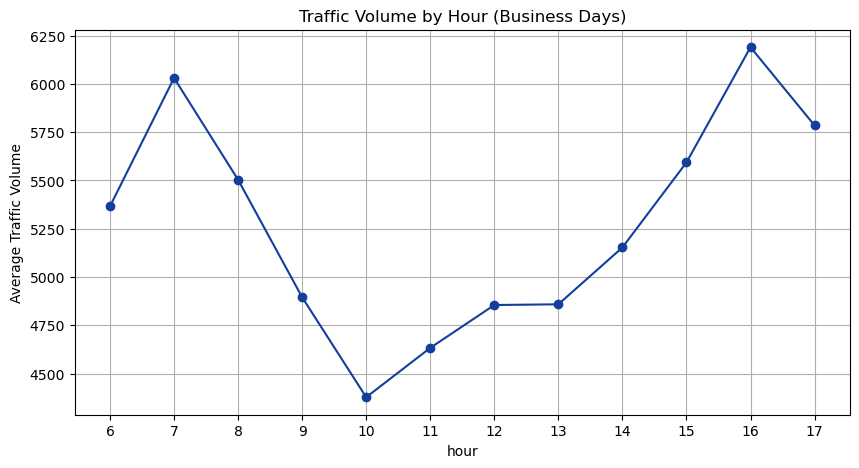

In [23]:
plt.figure(figsize=(10,5))

business_days = weekday_6_17.loc[weekday_6_17['dayofweek'] <=4]
avg_business_days = business_days.groupby('hour')['traffic_volume'].mean()

plt.plot(avg_business_days.index, avg_business_days.values,
        color = '#123e9c', marker = 'o')

#Title, xlabel, ylabel
plt.title("Traffic Volume by Hour (Business Days)")
plt.xlabel('hour')
plt.ylabel('Average Traffic Volume')
plt.xticks(ticks = range(6,18))

plt.grid()
plt.show()

* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.

# Weather Indicators

## Correlation with Traffic Volume

Find the weather column with the strongest correlation with traffic_volume and plot a scatter plot for this weather column and traffic_volume.

In [24]:
correlation = weekday_6_17.corr(numeric_only=True)['traffic_volume'].drop(['traffic_volume','hour'])
display(correlation)
print(f"The strongest correlation with traffic volume is {correlation.idxmax()}")

temp          0.131705
rain_1h       0.003193
snow_1h       0.001752
clouds_all   -0.017815
dayofweek    -0.464407
Name: traffic_volume, dtype: float64

The strongest correlation with traffic volume is temp


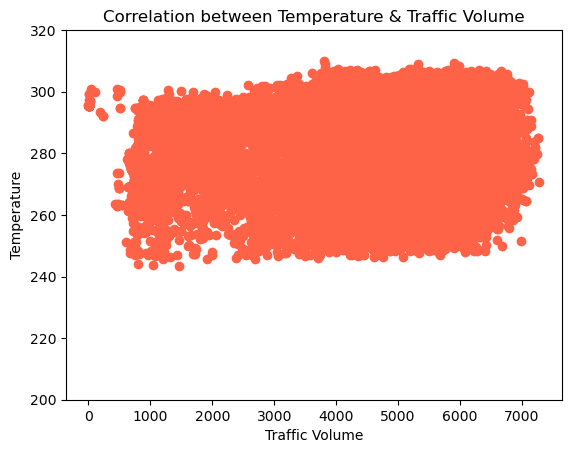

In [25]:
plt.scatter(weekday_6_17['traffic_volume'], weekday_6_17['temp'],
            color = 'tomato')

plt.title('Correlation between Temperature & Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature')
plt.ylim(200,320)
plt.show()

- The temperature in station in midway between `Minneapolis` and `Saint Paul` is about 240K to 310K ~ 33∘C - 36∘C
- The  distribution of dirrection of point is not clear, it doesn't show an upward trend or downward trend.
- This means that Temperature is not an indicicator causing heavy traffic in 6:00 AM to 17:00 PM

## Weather Types

In [26]:
weather_summary = weekday_6_17.groupby('weather_main')['traffic_volume'].agg(['count','mean']).sort_values(by='count', ascending=False).reset_index()
weather_name = weather_summary['weather_main'].unique()
weather_freq = weather_summary['count']
weather_avg = weather_summary['mean']

display(weather_summary)

,weather_main,count,mean
0,Clouds,8382,4867.405512
1,Clear,5833,4754.875879
2,Mist,2846,4588.873858
3,Rain,2822,4822.534373
4,Snow,1470,4395.472789
5,Drizzle,900,4835.712222
6,Haze,828,4612.774155
7,Thunderstorm,443,4629.580135
8,Fog,434,4376.237327
9,Smoke,12,4321.500000


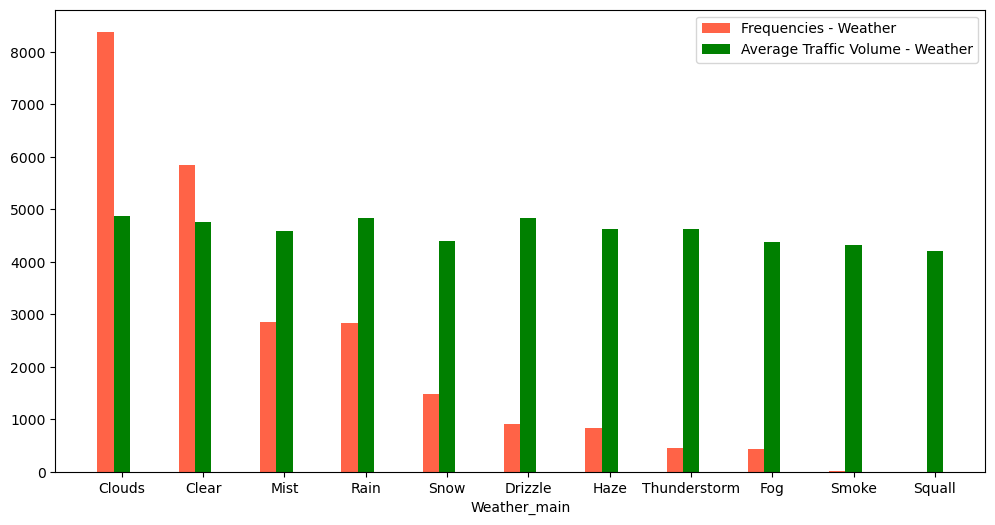

In [27]:
plt.figure(figsize=(12,6))

weather_index = np.arange(len(weather_summary))
width = 0.2

plt.bar(weather_index, weather_freq, width, 
         color = 'tomato', label = 'Frequencies - Weather')
plt.bar(weather_index + width, weather_avg, width, 
         color = 'green', label = 'Average Traffic Volume - Weather')

#Title , xlabel, ylabel
plt.xlabel('Weather_main')
plt.xticks(weather_index + width, weather_name)

plt.legend()
plt.show()

- Frequency:
    - Normal & Good Weather:
        - **Clouds** and **Clear** are popular weather with more than 5,000 frequencies. This reflects these dont have negative effects on commuting.
    - Bad Weather:
         - **Snow**, **Drizzle**, **Thurnderstorm** and **Fog**: seldom - less than 2,000 frequencies
         - **Smoke** and **Squall**: rarely - less than 20
- Average:
    - Normal & Bad weather: There is no difference, all weather type have average traffic volume below 5,000 cars. The distribution of traffic is the same.

- **Main weather is not an indicator causing heavy traffic on I-94**

Let's dig deeper into `weather_description`, which has a more granular weather classification.

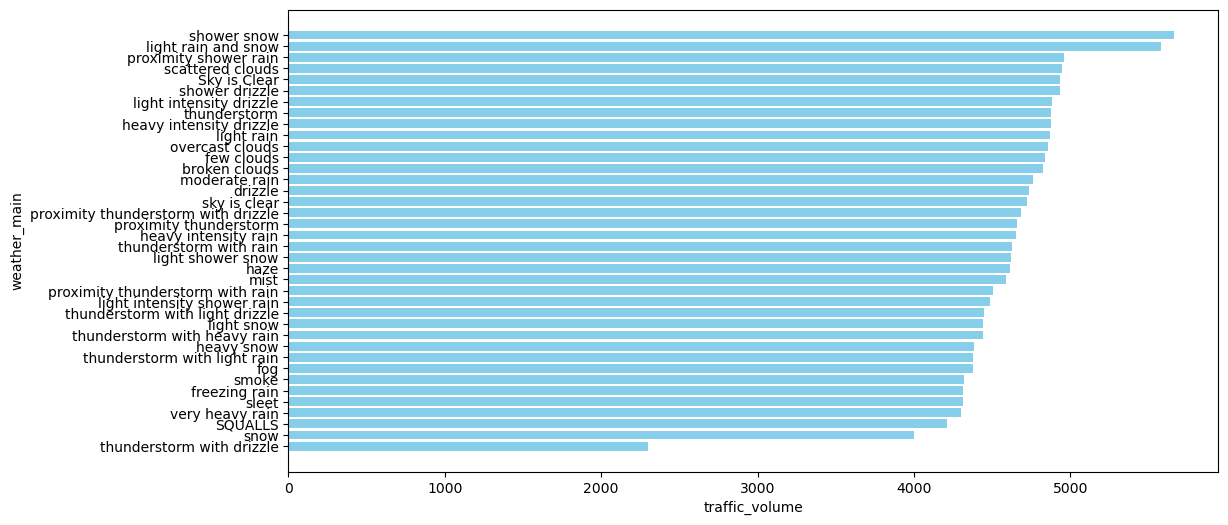

In [28]:
plt.figure(figsize=(12,6))
weather_traffic = weekday_6_17.groupby('weather_description')['traffic_volume'].mean().sort_values(ascending=True)

plt.barh(weather_traffic.index,weather_traffic.values, color = 'Skyblue')
plt.xlabel('traffic_volume')
plt.ylabel('weather_main')
plt.show()

There are two weather types where traffic exceeds 5,000 cars:
- Shower snow
- Light rain and snow

# Conclusion

In this project, we explored the dataset to identify the indicators causing Heavy Traffic on **weekdays** and **holidays**. During this process, we found out that on weekday - peoples' living habit tend to commute to work and school at `7:00 AM` and back home at `16:00 PM`. Additionally, after this hours, people less use cars to pass the station between `Minneapolis` and `Saint Paul`. About Holidays, they did not give any useful insights for the dataset.

- Time indicators:
    - Bussiness days - Weekends: Traffic congestions is higher on business days compared to weekends
    - Rush hours: On business days, the peak traffic - rush hours are round `7:00 AM` - `16:00 PM`
- Weather indicators:
    - Weather conditions with heavy traffics: **Shower snow, Light rain and snow**